# Predicting Heart Failure
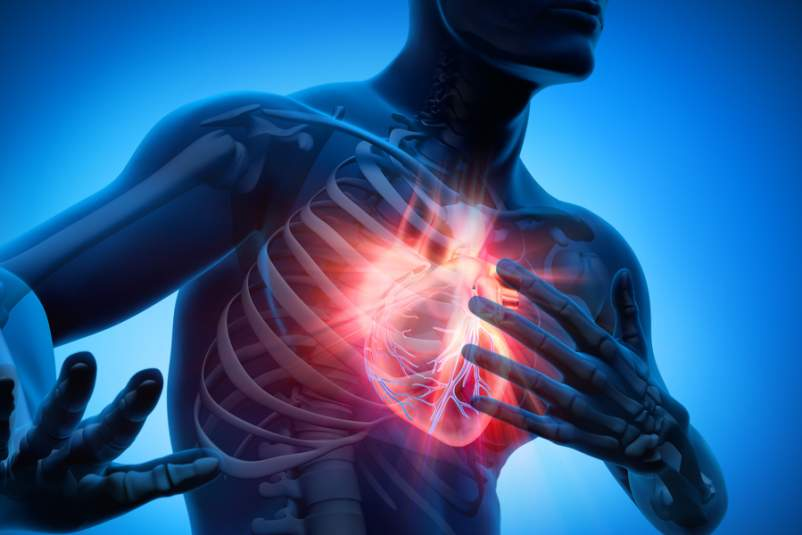

###### Dataset Intelligence


Context

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.
Attribute Information

    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]

###### Source

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

    Cleveland: 303 observations
    Hungarian: 294 observations
    Switzerland: 123 observations
    Long Beach VA: 200 observations
    Stalog (Heart) Data Set: 270 observations

Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

###### Citation
fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [May13,2022] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import joblib
from time import time



import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from random import randint

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

import dabl

In [2]:
df = pd.read_csv(r"heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [3]:
df.shape

(918, 12)

In [5]:
df.describe

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Figure size 432x288 with 0 Axes>

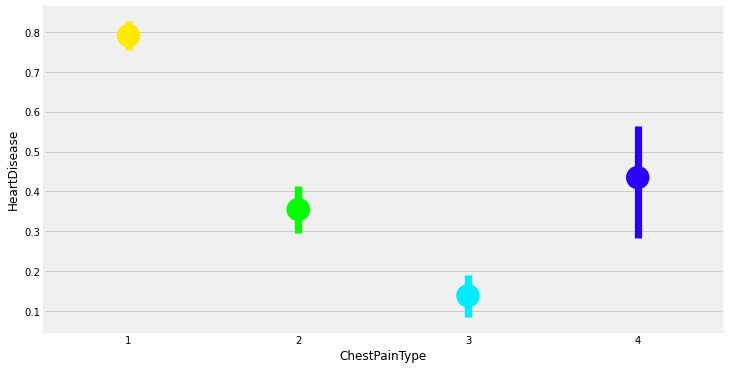

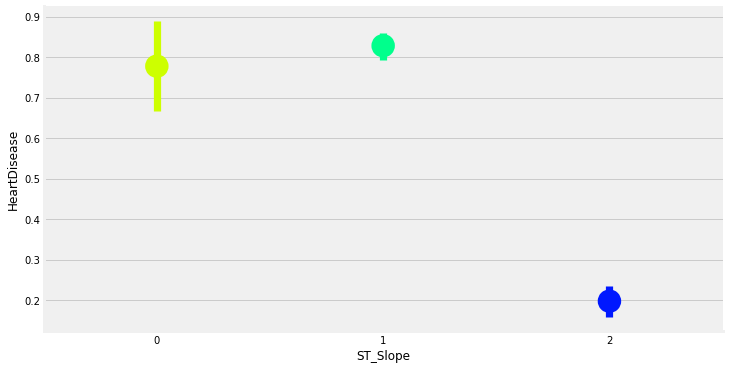

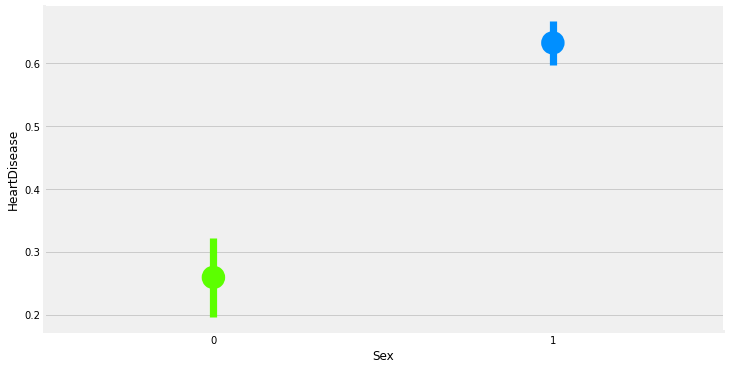

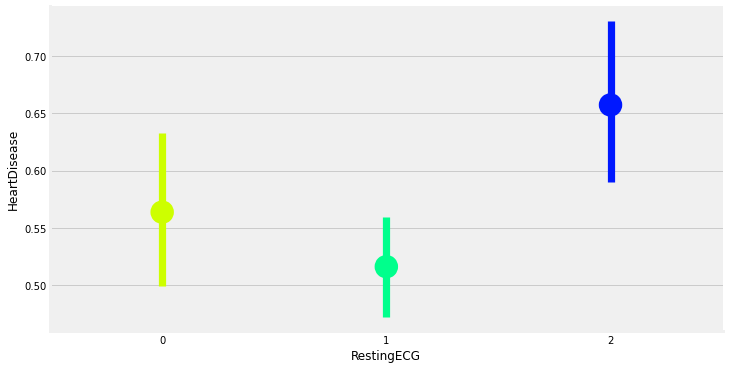

In [62]:
for i, col in enumerate(['ChestPainType', 'ST_Slope', 'Sex', 'RestingECG']):
    plt.figure(i)
    sns.catplot(x=col, y='HeartDisease', data=df, kind='point', aspect=2, palette='gist_rainbow')

In [8]:
df['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

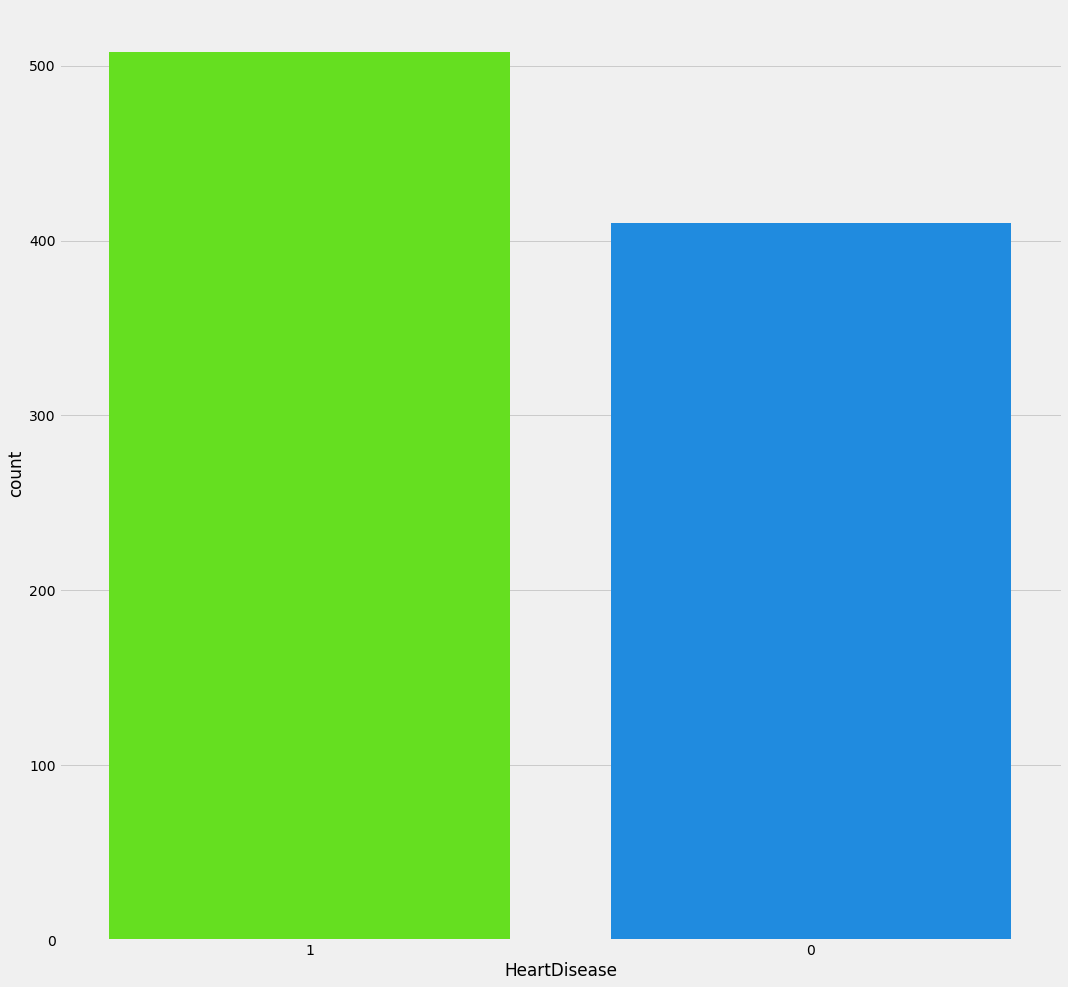

In [49]:
sns.countplot(data=df,
              x='HeartDisease',
              palette='gist_rainbow',
              order=df.HeartDisease.value_counts().index)

In [10]:
df['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

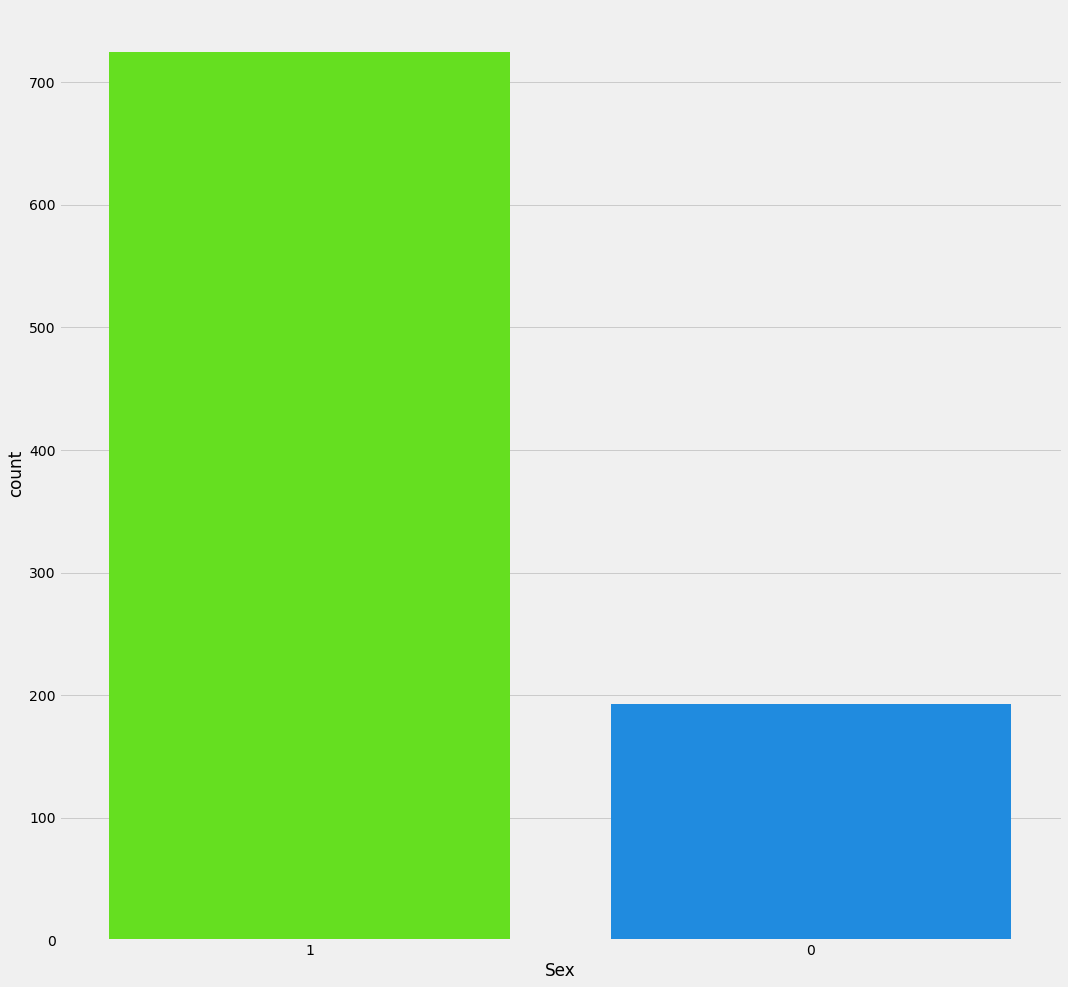

In [48]:
sns.countplot(data=df,
              x='Sex',
              palette='gist_rainbow',
              order=df.Sex.value_counts().index)

In [11]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

<AxesSubplot:xlabel='ChestPainType', ylabel='count'>

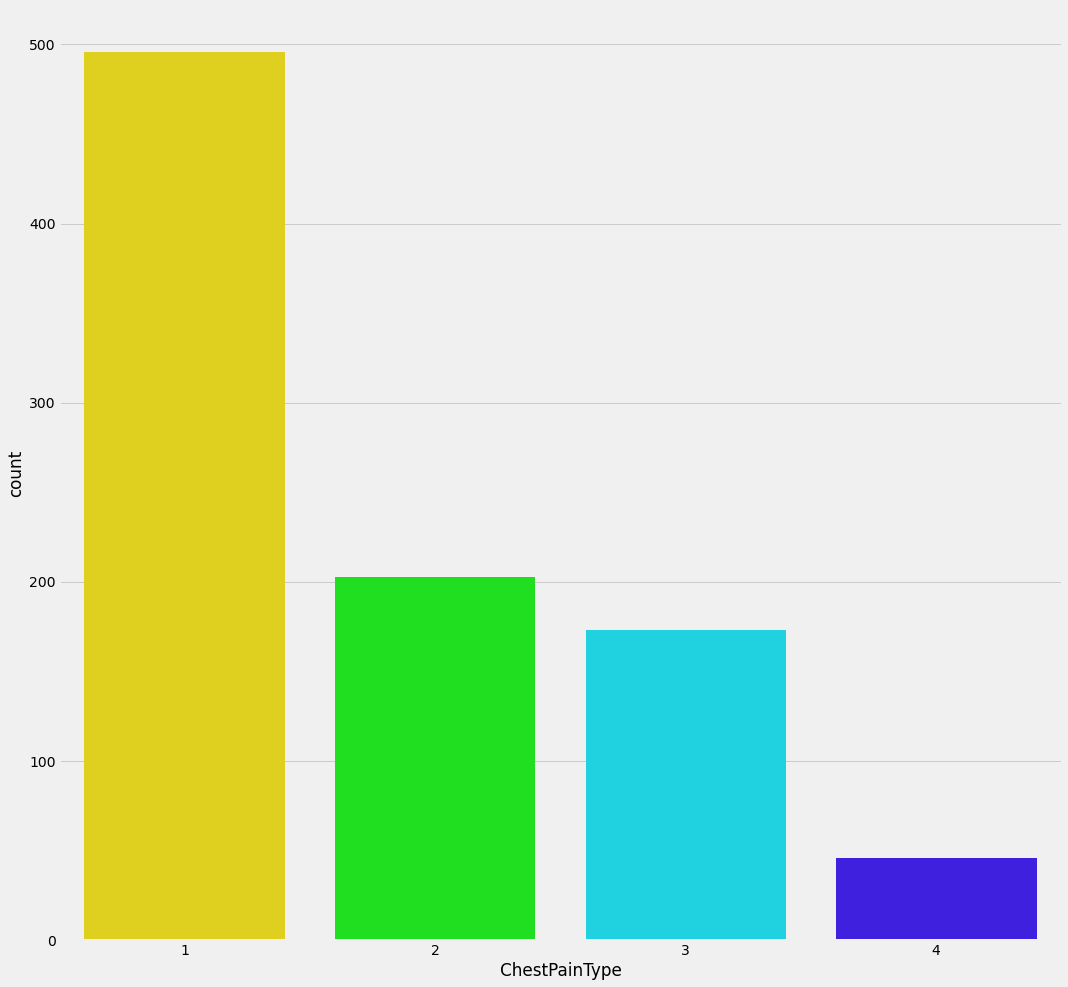

In [47]:
sns.countplot(data=df,
              x='ChestPainType',
              palette='gist_rainbow',
              order=df.ChestPainType.value_counts().index)

In [12]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

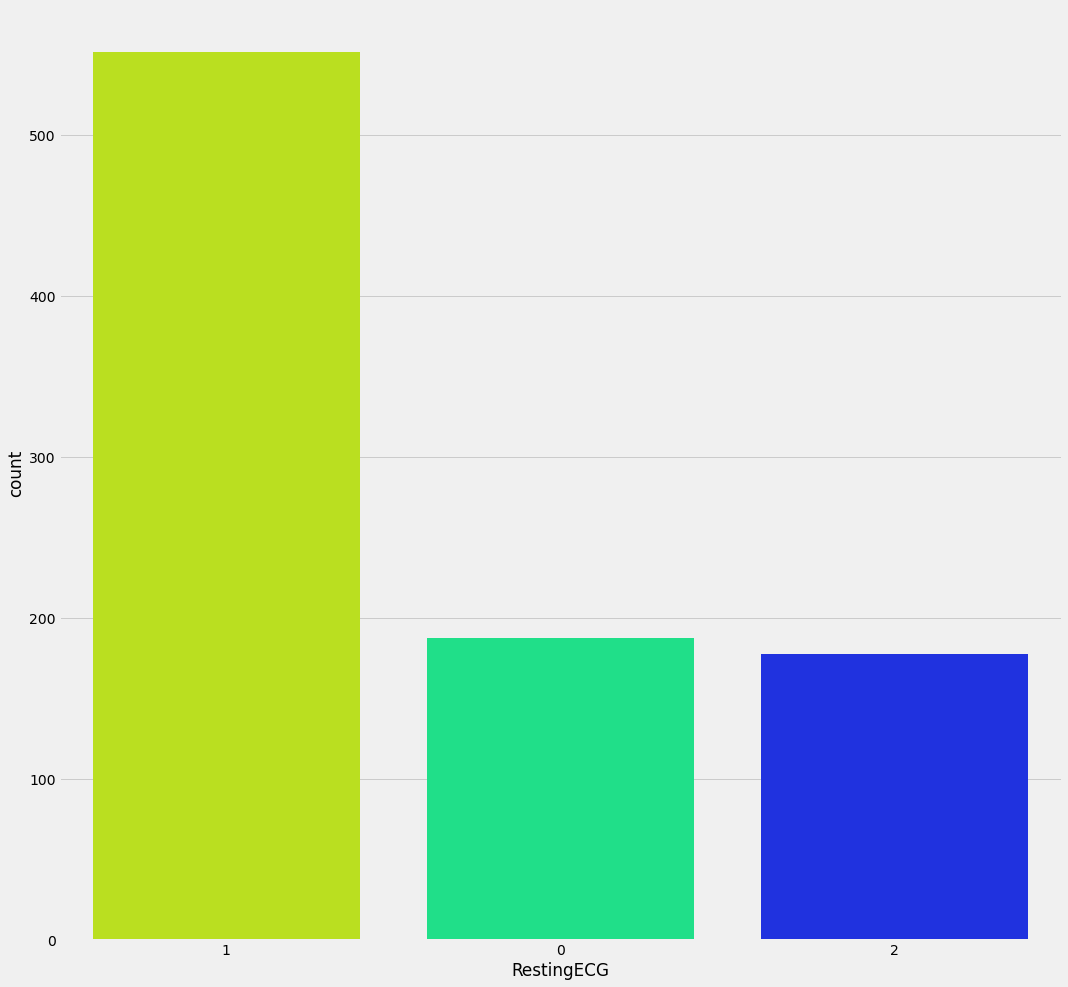

In [51]:
sns.countplot(data=df,
              x='RestingECG',
              palette='gist_rainbow',
              order=df.RestingECG.value_counts().index)

In [14]:
df['ExerciseAngina'].value_counts(ascending = True)

Y    371
N    547
Name: ExerciseAngina, dtype: int64

In [16]:
df['ST_Slope'].value_counts(normalize=True)

Flat    0.501089
Up      0.430283
Down    0.068627
Name: ST_Slope, dtype: float64

In [19]:
fig = px.scatter(df,
                 x="Cholesterol",
                 y="Age",
                 size="RestingBP",
                 color="HeartDisease",
                 hover_name="ChestPainType",
                 log_x=True,
                 size_max=70,
                title="Heart Disease by Age & Cholesterol")
fig.show()

Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()
# label encoding for RestingECG
df['RestingECG'] = le.fit_transform(df['RestingECG'])

# label encoding for Type of Chest Pain, mapped to the values to each of the categories
df['ChestPainType'] = df['ChestPainType'].replace('ASY', 1)
df['ChestPainType'] = df['ChestPainType'].replace('NAP', 2)
df['ChestPainType'] = df['ChestPainType'].replace('ATA', 3)
df['ChestPainType'] = df['ChestPainType'].replace('TA', 4)

# label encoding for Exercise Angina
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])

#label encoding for gender
df['Sex'] = le.fit_transform(df['Sex'])

#label encoding for Heart Disease
df['HeartDisease'] = le.fit_transform(df['HeartDisease'])

#label encoding forST_Slope

df['ST_Slope'] = le.fit_transform(df['ST_Slope'])


In [24]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,3,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,3,130,283,0,2,98,0,0.0,2,0
3,48,0,1,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


Train / Test Split

In [25]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=42)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(734, 11)
(734,)
(184, 11)
(184,)


Scaling Data

In [29]:
# creating a scaler
MM = MinMaxScaler()

# feeding the independent variable into the scaler
X_train = MM.fit_transform(X_train)
X_test = MM.transform(X_test)

Logistic Regression model

In [63]:
X_features = X
y_labels = y

In [67]:
# creating a model
model = LogisticRegression()

# feeding the training data to the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# calculating the classification accuracies
print("Training Accuracy is:", model.score(X_train, y_train))
print("Testing Accuracy is:", model.score(X_test, y_test))

Training Accuracy is: 0.8569482288828338
Testing Accuracy is: 0.8478260869565217


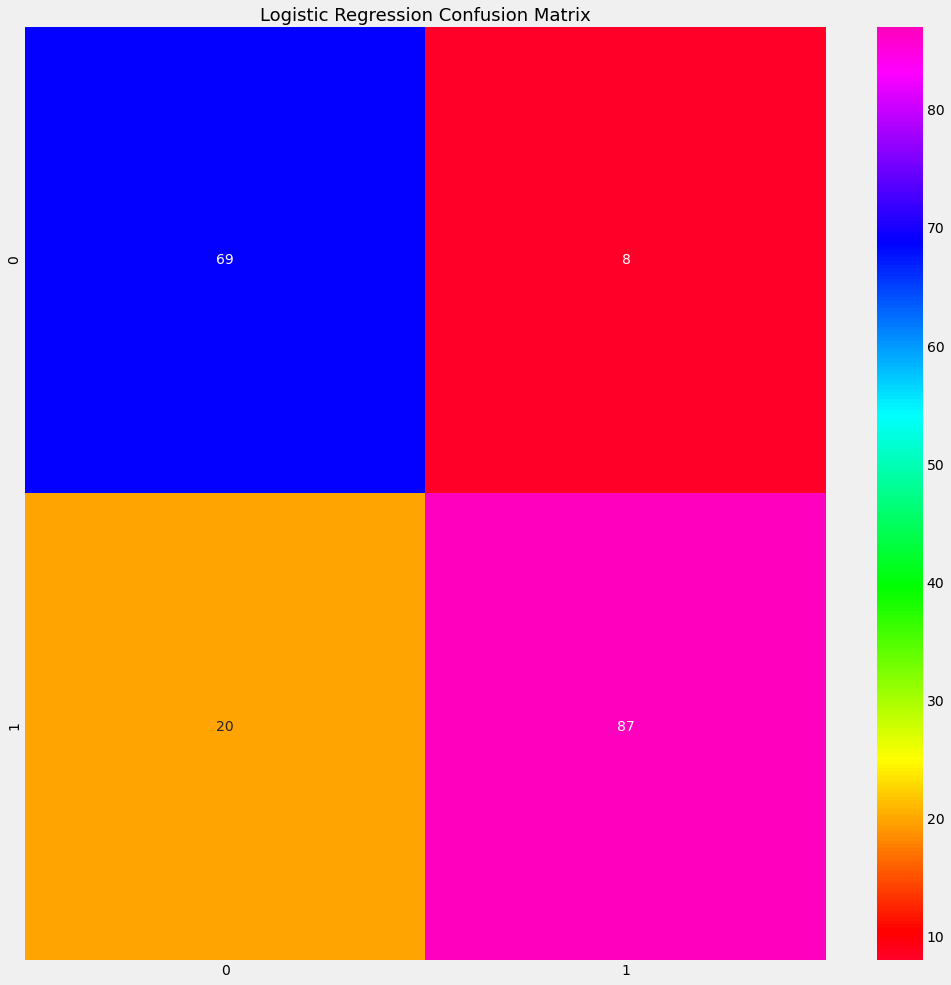

In [31]:
# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (16, 16)
sns.heatmap(cm, annot = True, cmap = 'gist_rainbow')
plt.title('Logistic Regression Confusion Matrix', fontweight = 25, fontsize = 18)
plt.show()

In [69]:
joblib.dump(cv.best_estimator_, '../../../LR_model.pkl')

['../../../LR_model.pkl']

Random Forest Model

In [102]:
model = RandomForestClassifier()

# feeding the training data to the model
model.fit(X_train, y_train)

# predicting the x-test results
y_pred = model.predict(X_test)

# calculating the accuracies
print("Training Accuracy is:", model.score(X_train, y_train))
print("Testing Accuracy is:", model.score(X_test, y_test))

Training Accuracy is: 1.0
Testing Accuracy is: 0.8967391304347826


Confusion Matrix

In [36]:
cm = confusion_matrix(y_test, y_pred)

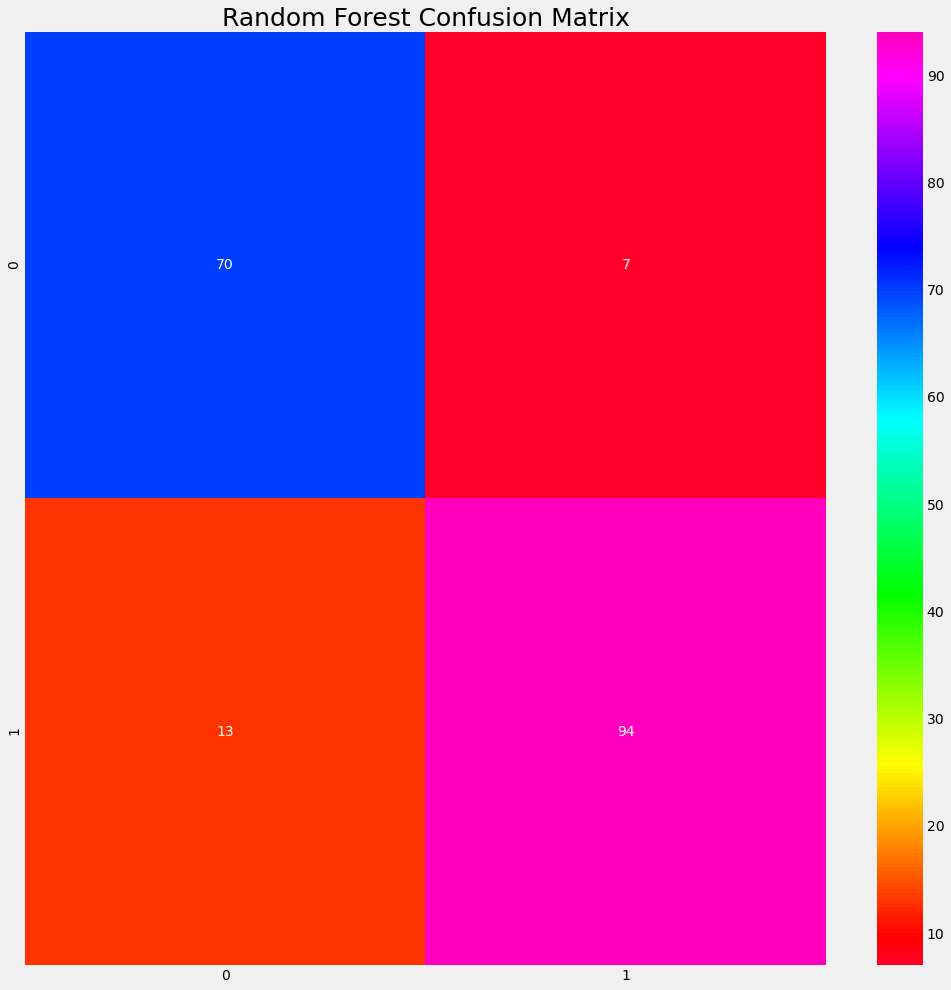

In [37]:
plt.rcParams['figure.figsize'] = (16, 16)
sns.heatmap(cm, annot = True, cmap = 'gist_rainbow')
plt.title('Random Forest Confusion Matrix', fontweight = 25, fontsize = 25)
plt.show()

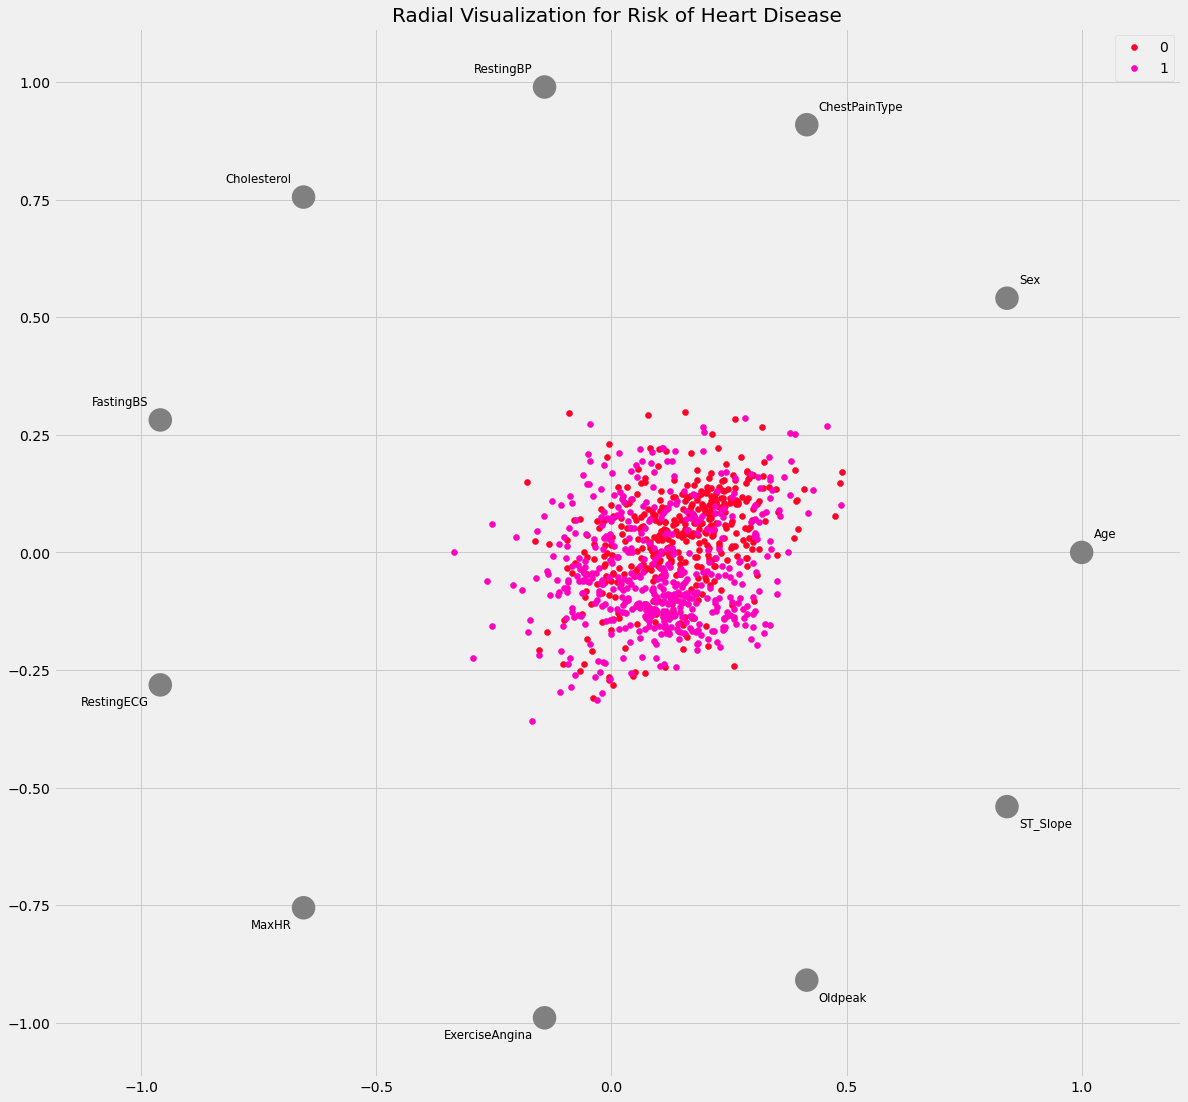

In [41]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(18, 18))
new_df = X.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="gist_rainbow")
plt.title('Radial Visualization for Risk of Heart Disease', fontsize = 20)
plt.show()

Gradient BoostingModel

In [73]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [76]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(X_features, y_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

0.553 (+/-0.002) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.782 (+/-0.11) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.812 (+/-0.139) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.836 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.553 (+/-0.002) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.813 (+/-0.123) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.83 (+/-0.107) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.828 (+/-0.076) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.553 (+/-0.002) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.808 (+/-0.076) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.815 (+/-0.104) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.815 (+/-0.084) for {'learning_ra

In [77]:
joblib.dump(cv.best_estimator_, '../../../GB_model.pkl')

['../../../GB_model.pkl']

###### Multilayer Perceptron Model (Deep Learning)

In [78]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [81]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(X_features, y_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'activation': 'logistic', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}

0.795 (+/-0.042) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.708 (+/-0.272) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.723 (+/-0.174) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.795 (+/-0.081) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.78 (+/-0.059) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.795 (+/-0.094) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.79 (+/-0.047) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.801 (+/-0.026) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.806 (+/-0.082) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'lear

In [82]:
cv.best_estimator_

MLPClassifier(activation='logistic', hidden_layer_sizes=(50,),
              learning_rate='adaptive')

In [83]:
joblib.dump(cv.best_estimator_, '../../../MLP_model.pkl')

['../../../MLP_model.pkl']

###### Support Vector Machines Model

In [89]:
svc = SVC()
parameters = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10]}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(X_features, y_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.815 (+/-0.067) for {'C': 0.1, 'kernel': 'linear'}
0.549 (+/-0.168) for {'C': 0.1, 'kernel': 'rbf'}
0.816 (+/-0.066) for {'C': 1, 'kernel': 'linear'}
0.685 (+/-0.133) for {'C': 1, 'kernel': 'rbf'}
0.814 (+/-0.066) for {'C': 10, 'kernel': 'linear'}
0.72 (+/-0.129) for {'C': 10, 'kernel': 'rbf'}


In [91]:
cv.best_estimator_

SVC(C=1, kernel='linear')

In [92]:
joblib.dump(cv.best_estimator_, '../../../SVM_model.pkl')

['../../../SVM_model.pkl']

###### SUMMARY

###### The Winner is:
* Random Forest is the best performing model with a testing accuracy prediction rate of about 90%.
* I hope you had as much fun with this project as I did!

 * Have a beautiful day!